In [5]:
#importando bibliotecas necessarias
import pandas as pd
import pickle as pk

In [6]:
#lendo os arquivos de treino e teste
with open('/content/sample_data/titanicTrain.pkl', 'rb') as f:
  X_treino, Y_treino = pk.load(f)
with open('/content/sample_data/titanicTest.pkl', 'rb') as f:
  X_teste, Y_teste = pk.load(f)

In [7]:
#verificando se importacoes foram bem sucedidas
#X_treino.tail(3)
#Y_treino.tail(3)
#X_teste.tail(3)
#Y_teste.tail(3)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#definindo hiperparametros possiveis
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#usando o modelo de RandomForest
modelo = RandomForestClassifier(random_state=42)

#configurando o RandomizedSearchCV
modelo = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

#treinando o modelo (testando varias combinacoes de hiperparametros)
treeCriada = modelo.fit(X_treino, Y_treino)

#melhor modelo encontrado
modelo = modelo.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [9]:
#testando o modelo
predicoes = modelo.predict(X_teste)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

#conferindo seus resultados
acuracia = classification_report(Y_teste, predicoes)
print(acuracia)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       236
           1       0.85      0.73      0.78       152

    accuracy                           0.84       388
   macro avg       0.84      0.82      0.83       388
weighted avg       0.84      0.84      0.84       388



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8427835051546392

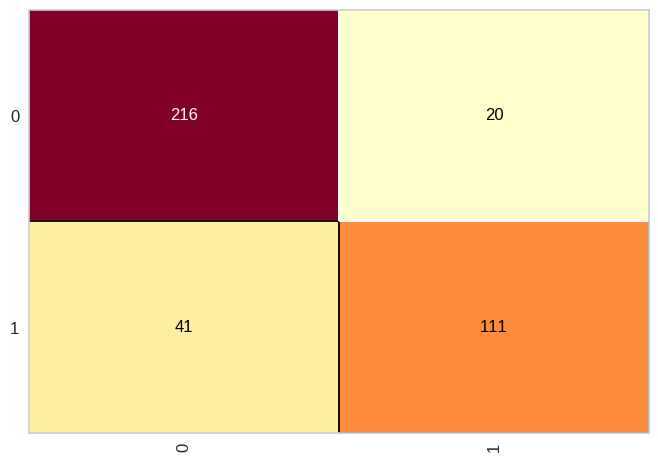

In [11]:
from yellowbrick.classifier import ConfusionMatrix

#mostrando a matriz de confusao
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, Y_treino)
cm.score(X_teste, Y_teste)